# Traveling Salesman problem
Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city exactly once and returns to the origin city?

## Input data

In [1]:
import numpy as np # for fast arithmetics
import matplotlib.pyplot as plt

In [2]:
# City names alphabetically
cityNames = ['Винница','Днепр','Житомир','Запорожье','Ивано-Франковск','Киев','Кропивницкий','Луцк','Львов','Николаев','Одесса','Полтава','Ровно','Сумы','Тернополь','Ужгород','Харьков','Херсон','Хмельницкий','Черкассы','Чернигов','Черновцы']
# Geographical coordinates in degrees (for visualization)
latitude = np.array([49.2347128, 48.4622135, 50.2678654, 47.8561438, 48.9117518, 50.401699, 48.5187443, 50.73977, 49.8326679, 46.9329791,46.4598865,49.6021346,50.6199879,50.9077873,49.5483334,48.6208922,49.9934789,46.6353956,49.4229619,49.4444119,51.4981791,48.2920574])
longitude = np.array([28.3995942, 34.8602731, 28.6036778, 35.0352701, 24.6470892, 30.2525101, 32.1456232, 25.2639651, 23.9421958, 31.8679134, 30.5717031,34.4871983,26.1815768,34.7280598,25.5276293,22.2178427,36.1603433,32.5468272,26.9170934,31.9897273,31.2193102,25.8657969])
# https://distancecalculator.globefeed.com/Ukraine_Distance_Calculator.asp
import math # factorial
N = len(cityNames); print("Number of cities: ",N)
print("Possible ways: ",math.factorial(N-1))
print(cityNames)

Number of cities:  22
Possible ways:  51090942171709440000
['Винница', 'Днепр', 'Житомир', 'Запорожье', 'Ивано-Франковск', 'Киев', 'Кропивницкий', 'Луцк', 'Львов', 'Николаев', 'Одесса', 'Полтава', 'Ровно', 'Сумы', 'Тернополь', 'Ужгород', 'Харьков', 'Херсон', 'Хмельницкий', 'Черкассы', 'Чернигов', 'Черновцы']


In [3]:
# Distance matrix using maps.google.com, by car.
d = np.array([
    [  0, 588, 128, 651, 368, 268, 322, 389, 364, 431, 426, 595, 277, 603, 236, 585, 707, 497, 120, 335, 411, 288],
    [588,   0, 596,85.4, 962, 480, 247, 875, 957, 322, 454, 164, 805, 358, 829,1180, 217, 329, 714, 286, 542, 844],
    [128, 596,   0, 690, 413, 140, 392, 261, 402, 507, 501, 480, 188, 475, 280, 657, 617, 573, 183, 308, 283, 371],
    [651,85.4, 690,   0,1026, 538, 310, 952,1021, 376, 508, 264, 860, 437, 893,1243, 297, 314, 778, 350, 620, 908],
    [368, 962, 413,1026,   0, 560, 694, 263, 132, 780, 798, 931, 275, 895, 130, 293,1082, 869, 235, 696, 746, 135],
    [268, 480, 140, 538, 560,   0, 303, 400, 541, 481, 475, 344, 327, 369, 420, 796, 456, 547, 323, 192, 142, 531],
    [322, 247, 392, 310, 694, 303,   0, 670, 693, 182, 309, 246, 598, 426, 564, 915, 386, 243, 449, 129, 428, 579],
    [389, 875, 261, 952, 263, 400, 670,   0, 180, 779, 774, 740,72.6, 734, 167, 426, 877, 845, 257, 587, 543, 336],
    [364, 957, 402,1021, 132, 541, 693, 180,   0, 802, 797, 879, 211, 874, 134, 268,1018, 867, 241, 727, 683, 276],
    [431, 322, 507, 376, 780, 481, 182, 779, 802,   0, 132, 428, 706, 606, 673,1024, 542,70.1, 558, 311, 610, 688],
    [426, 454, 501, 508, 798, 475, 309, 774, 797, 132,   0, 560, 702, 770, 624,1020, 674, 201, 553, 417, 611, 683],
    [595, 164, 480, 264, 931, 344, 246, 740, 879, 428, 560,   0, 668, 177, 760,1128, 143, 491, 664, 243, 405, 827],
    [277, 805, 188, 860, 275, 327, 598,72.6, 211, 706, 702, 668,   0, 663, 159, 467, 804, 774, 195, 516, 471, 328],
    [603, 358, 475, 437, 895, 369, 426, 734, 874, 606, 770, 177, 663,   0, 783,1152, 187, 668, 656, 325, 297, 895],
    [236, 829, 280, 893, 130, 420, 564, 167, 134, 673, 624, 760, 159, 783,   0, 352, 897, 739, 111, 561, 562, 171],
    [585,1180, 657,1243, 293, 796, 915, 426, 268,1024,1020,1128, 467,1152, 352,   0,1265,1090, 462, 935, 931, 407],
    [707, 217, 617, 297,1082, 456, 386, 877,1018, 542, 674, 143, 804, 187, 897,1265,   0, 547, 800, 381, 508, 964],
    [497, 329, 573, 314, 869, 547, 243, 845, 867,70.1, 201, 491, 774, 668, 739,1090, 547,   0, 624, 373, 672, 754],
    [120, 714, 183, 778, 235, 323, 449, 257, 241, 558, 553, 664, 195, 656, 111, 462, 800, 624,   0, 447, 467, 189],
    [335, 286, 308, 350, 696, 192, 129, 587, 727, 311, 417, 243, 516, 325, 561, 935, 381, 373, 447,   0, 297, 600],
    [411, 542, 283, 620, 746, 142, 428, 543, 683, 610, 611, 405, 471, 297, 562, 931, 508, 672, 467, 297,   0, 672],
    [288, 844, 371, 908, 135, 531, 579, 336, 276, 688, 683, 827, 328, 895, 171, 407, 964, 754, 189, 600, 672,   0]])

# Time by car
t = np.array([
    [  0, 484,  99, 521, 336, 236, 266, 311, 323, 357, 298, 434, 238, 493, 181, 520, 565, 401, 118, 292, 326, 268],
    [484,   0, 474,  82, 866, 407, 234, 706, 765, 274, 398, 175, 613, 322, 688, 980, 165, 292, 589, 288, 436, 722],
    [ 99, 474,   0, 582, 396, 101, 352, 204, 304, 419, 367, 337, 130, 384, 248, 497, 458, 476, 176, 253, 221, 340],
    [521,  82, 582,   0, 898, 483, 271, 784, 826, 305, 431, 244, 675, 377, 723,1016, 240, 280, 629, 331, 498, 765],
    [336, 866, 396, 898,   0, 482, 623, 259, 124, 692, 634, 714, 245, 774, 151, 257, 807, 725, 228, 617, 594, 124],
    [236, 407, 101, 483, 482,   0, 263, 309, 383, 377, 319, 240, 222, 279, 356, 595, 347, 423, 263, 153, 119, 429],
    [266, 234, 352, 271, 623, 263,   0, 589, 581, 141, 263, 236, 473, 401, 472, 773, 340, 207, 390, 114, 345, 520],
    [311, 706, 204, 784, 259, 309, 589,   0, 166, 632, 575, 553,  64, 597, 155, 370, 649, 662, 229, 450, 421, 298],
    [323, 765, 304, 826, 124, 383, 581, 166,   0, 663, 602, 633, 164, 692, 124, 240, 731, 690, 193, 548, 518, 250],
    [357, 274, 419, 305, 692, 377, 141, 632, 663,   0, 124, 383, 540, 543, 541, 884, 432,  67, 450, 255, 492, 588],
    [298, 398, 367, 431, 634, 319, 263, 575, 602, 124,   0, 488, 499, 593, 491, 831, 556, 177, 405, 333, 438, 537],
    [434, 175, 337, 244, 714, 240, 236, 553, 633, 383, 488,   0, 483, 202, 606, 846, 124, 409, 516, 214, 301, 687],
    [238, 613, 130, 675, 245, 222, 473,  64, 164, 540, 499, 483,   0, 534, 142, 381, 568, 592, 181, 379, 351, 287],
    [493, 322, 384, 377, 774, 279, 401, 597, 692, 543, 593, 202, 534,   0, 657, 884, 182, 574, 559, 283, 260, 731],
    [181, 688, 248, 723, 151, 356, 472, 155, 124, 541, 491, 606, 142, 657,   0, 325, 694, 589,  91, 484, 479, 153],
    [520, 980, 497,1016, 257, 595, 773, 370, 240, 884, 831, 846, 381, 884, 325,   0, 950, 888, 409, 753, 720, 373],
    [565, 165, 458, 240, 807, 347, 340, 649, 731, 432, 556, 124, 568, 182, 694, 950,   0, 444, 633, 323, 413, 800],
    [401, 292, 476, 280, 725, 423, 207, 662, 690,  67, 177, 409, 592, 574, 589, 888, 444,   0, 502, 299, 537, 635],
    [118, 589, 176, 629, 228, 263, 390, 229, 193, 450, 405, 516, 181, 559,  91, 409, 633, 502,   0, 413, 397, 172],
    [292, 288, 253, 331, 617, 153, 114, 450, 548, 255, 333, 214, 379, 283, 484, 753, 323, 299, 413,   0, 227, 534],
    [326, 436, 221, 498, 594, 119, 345, 421, 518, 492, 438, 301, 351, 260, 479, 720, 413, 537, 397, 227,   0, 564],
    [268, 722, 340, 765, 124, 429, 520, 298, 250, 588, 537, 687, 287, 731, 153, 373, 800, 635, 172, 534, 564,   0]])

## Approach
1) The initial arrangement of <i>N</i> cities is arbitrary. The last item in the list is the same as the 1st element.<br>
2) Starting with the 1st city in the above list and working your way up the list, try swapping pairs of neighboring cities. The permutation is accepted every time it gives a shorter distance.<br>
3) Repeat Step 2 until no decrease in distance can be achieved.<br>
4) Repeat Steps 2-3 for increasing number <i>n</i> of neighboring cities (3, 4, ..., <i>N</i>-1). Check only <i>n</i>-1 cyclic permutations.<br>
5) All other rearrangements of <i>n</i> cities are addressed by rearranging from <i>n</i>-1 down to 2 cities, Steps 2-3.<br>

In [28]:
def PR(): # print current result
    global r,d_min
    print("d =",d_min,"; r =",r)
def init():
    global d_min,r
    d_min=0 # current minimal distance
    r=[0] # r - current shortest route: a list of city numbers along the currently shortest route
    for i in range(1,N):
        d_min += d[i-1][i]
        r.append(i)
    d_min += d[0][N-1]
    r.append(0) # The last item in the list is the same as the 1st element
    PR()
def init_prev():
    global d_min,r
    d_min=0 # current minimal distance
    # r - current shortest route: a list of city numbers along the currently shortest route, Distance = 3986.1
    r = [0, 19, 6, 10, 9, 17, 3, 1, 11, 16, 13, 20, 5, 2, 12, 7, 8, 15, 4, 21, 14, 18, 0]
    for i in range(1,N):
        d_min += d[r[i-1]][r[i]]
    d_min += d[0][r[N-1]]
    PR()

def optcities(n):
    #print("Rearrange ",n," cities:")
    global d_min,r
    d_old = d_min+1 # keep track if distance has decreased
    while d_min < d_old:
        d_old = d_min # current minimal distance
        for i in range(N-n): # for all possible starting positions of the city preceding the 1st of the cycled n cities
            # Old distance:
            SC = r[i]; # preceding city, fixed
            C = np.zeros(n,dtype='int'); # cycled cities: list of n cycled cities
            for j in range(n):
                C[j] = r[i+1+j]; # jth cycled city
            FC = r[i+n+1]; # final city, fixed
            l1 = d[SC][C[0]] # l1 - original distance of the route starting at SC ...
            for j in range(n-1):
                l1 += d[C[j]][C[j+1]] # ... and passing through the n cities ...
            l1 += d[C[n-1]][FC]; # ... and the next final city
            for k in range(1,n):
                D=np.roll(C, -k); # cycling n cities k times
                # New distance:
                l2 = d[SC][D[0]] # l2 - distance of the above route after cycling: starting at SC ...
                for j in range(n-1):
                    l2 += d[D[j]][D[j+1]] # ... and passing through the n cycled cities ...
                l2 += d[D[n-1]][FC]; # ... and the next final city
                # If the cycled arrangement offers a shorter distance:
                if l2 < l1:
                    print(C,'->',D) # print the successfull cycling
                    for j in range(n):
                        r[i+1+j] = D[j]; # apply successfull cycling C -> D
                    d_min -= l1-l2 # update the minimal distance
                    l1 = l2 # update the distance of (SC - n cycled cities - FC)
                    C = D; # update the list of n cycled cities
        
        if d_min < d_old: PR() # print results if the distance has shortened
        if n>2: optcities(n-1) # All other rearrangements of n cities are addressed by rearranging from n-1 down to 2 cities
def swap2best():
    #print("Swap 2 cities, apply only the best result")
    global d_min,r,c, i_opt,j_opt,dr_min
    dr_min=0 # change in distance
    for i in range(1,N-1):
        dr_out1 = -d[r[i-1]][r[i]] - d[r[i]][r[i+1]] # r[i] is taken out
        for j in range(i+1,N):
            if (j <= i-2) or (i+2 <= j):
                dr_out2 = -d[r[j-1]][r[j]] - d[r[j]][r[j+1]] # r[j] is taken out
                dr_in1 = d[r[j-1]][r[i]] + d[r[i]][r[j+1]] # r[i] is put in j
                dr_in2 = d[r[i-1]][r[j]] + d[r[j]][r[i+1]] # r[j] is put in i
                dr = dr_out1+dr_out2+dr_in1+dr_in2
                if dr < dr_min:
                    dr_min = dr; i_opt=i; j_opt=j;
            elif j == i-1:
                dr_out2 = -d[r[j-1]][r[j]] # r[j] is taken out
                dr_in = d[r[j-1]][r[i]] + d[r[i]][r[j]] + d[r[j]][r[i+1]] # r[i] is put in j, r[j] is put in i
                dr = dr_out1+dr_out2+dr_in
                if dr < dr_min:
                    dr_min = dr; i_opt=i; j_opt=j;
            elif j == i+1:
                dr_out2 = -d[r[j]][r[j+1]] # r[j] is taken out
                dr_in = d[r[i-1]][r[j]] + d[r[j]][r[i]] + d[r[i]][r[j+1]] # r[j] is put in i, r[i] is put in j
                dr = dr_out1+dr_out2+dr_in
                if dr < dr_min:
                    dr_min = dr; i_opt=i; j_opt=j;
    if dr_min<0:
        print(str(r[i_opt])+"<->"+str(r[j_opt])+"; dc="+str(dr_min))
        tmp = r[i_opt]; r[i_opt] = r[j_opt]; r[j_opt] = tmp; d_min = d_min+dr_min

# function to get unique values
def unique(list1):
    unique_list = []
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    return unique_list
def ver(r):
    global N
    if (len(r) != N+1) or (len(unique(r)) != N):
        print("ERROR: incorrect r!");
    else:
        print("Verification is successful:\nr =",r);
    dv=0
    for i in range(N):
        dv += d[r[i]][r[i+1]]
    print("Distance =",dv)

## Run

In [ ]:
init();
for i in range(2,N):
    optcities(i);

In [ ]:
ver(r)

In [ ]:
def optcities(n):
    #print("Rearrange ",n," cities:")
    global d_min,r
    d_old = d_min+1 # keep track if distance has decreased
    while d_min < d_old:
        d_old = d_min # current minimal distance
        for i in range(N-n): # for all possible starting positions of the city preceding the 1st of the cycled n cities
            # Old distance:
            SC = r[i]; # preceding city, fixed
            C = np.zeros(n,dtype='int'); # cycled cities: list of n cycled cities
            for j in range(n):
                C[j] = r[i+1+j]; # jth cycled city
            FC = r[i+n+1]; # final city, fixed
            l1 = d[SC][C[0]] # l1 - original distance of the route starting at SC ...
            for j in range(n-1):
                l1 += d[C[j]][C[j+1]] # ... and passing through the n cities ...
            l1 += d[C[n-1]][FC]; # ... and the next final city
            for k in range(1,n):
                D=np.roll(C, -k); # cycling n cities k times
                # New distance:
                l2 = d[SC][D[0]] # l2 - distance of the above route after cycling: starting at SC ...
                for j in range(n-1):
                    l2 += d[D[j]][D[j+1]] # ... and passing through the n cycled cities ...
                l2 += d[D[n-1]][FC]; # ... and the next final city
                if l2 < l1: # if the cycled arrangement offers a shorter distance
                    #print(C,'->',D) # print the successfull cycling
                    for j in range(n):
                        r[i+1+j] = D[j]; # apply successfull cycling C -> D
                    d_min -= l1-l2 # update the minimal distance
                    l1 = l2 # update the distance of (SC - n cycled cities - FC)
                    C = D; # update the list of n cycled cities
                D=np.flip(C,0)
                # New distance:
                l2 = d[SC][D[0]] # l2 - distance of the above route after cycling: starting at SC ...
                for j in range(n-1):
                    l2 += d[D[j]][D[j+1]] # ... and passing through the n cycled cities ...
                l2 += d[D[n-1]][FC]; # ... and the next final city
                if l2 < l1: # if the reversed arrangement offers a shorter distance
                    #print(C,'->',D) # print the successfull cycling
                    for j in range(n):
                        r[i+1+j] = D[j]; # apply successfull cycling C -> D
                    d_min -= l1-l2 # update the minimal distance
                    l1 = l2 # update the distance of (SC - n cycled cities - FC)
                    ###C = D; # update the list of n cycled cities
                    #PR() # print results if the distance has shortened
                    updated = True
        if d_min < d_old: PR() # print results if the distance has shortened
        if n>2: optcities(n-1) # All other rearrangements of n cities are addressed by rearranging from n-1 down to 2 cities


In [60]:
init_prev();
for i in range(2,N):
    optcities(i);

d = 3986.1 ; r = [0, 19, 6, 10, 9, 17, 3, 1, 11, 16, 13, 20, 5, 2, 12, 7, 8, 15, 4, 21, 14, 18, 0]


In [ ]:
ver(r) #Verification of no repeated cities

## Swap 2 best only

In [46]:
init(); dm=[d_min]; i=[0]; j=[0]; dr=[0];
for ii in range(30):
    swap2best()
    if dr_min==0: break
    dm.append(d_min)
    i.append(i_opt); j.append(j_opt); dr.append(dr_min)
print("Distances =",dm)
ver(r)

d = 12713.0 ; r = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 0]
3<->12; dc=-1883.0
1<->18; dc=-1337.0
11<->17; dc=-878.0
5<->21; dc=-699.0
6<->15; dc=-1083.0
9<->14; dc=-735.0
13<->1; dc=-583.6
4<->7; dc=-182.39999999999998
21<->8; dc=-255.0
16<->11; dc=-130.0
3<->9; dc=-115.89999999999998
1<->6; dc=-222.0
2<->14; dc=-24.0
17<->9; dc=-8.0
Distances = [12713.0, 10830.0, 9493.0, 8615.0, 7916.0, 6833.0, 6098.0, 5514.4, 5332.0, 5077.0, 4947.0, 4831.1, 4609.1, 4585.1, 4577.1]
Verification is successful:
r = [0, 18, 14, 12, 7, 8, 15, 4, 21, 2, 10, 9, 17, 6, 3, 1, 11, 16, 13, 19, 20, 5, 0]
Distance = 4577.1


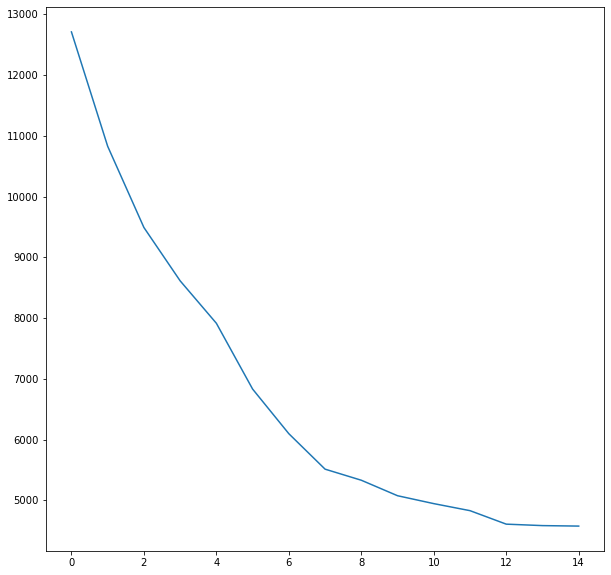

In [47]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(10,10))
plt.plot(dm)

## Swap 2 first

In [36]:
init(); dm=[d_min]; i=[0]; j=[0]; dr=[0];
while swap2first():
    dm.append(d_min)
    #i.append(i_opt); j.append(j_opt); dr.append(dr)
print("Distances =",dm)
ver(r)

2<->1; dr=-1064.6
3<->2; dr=-90.00000000000011
12<->3; dr=-284.4000000000001
1<->12; dr=-97.0
4<->1; dr=-647.0
7<->4; dr=-205.39999999999998
12<->7; dr=-39.0
6<->2; dr=-384.0
2<->7; dr=-52.59999999999991
5<->12; dr=-59.39999999999998
2<->5; dr=-229.0
18<->2; dr=-15.0
16<->18; dr=-6.0
5<->16; dr=-356.0
1<->5; dr=-341.0
16<->1; dr=-20.0
6<->16; dr=-232.0
11<->6; dr=-15.0
1<->11; dr=-81.0
6<->1; dr=-263.6
13<->6; dr=-134.0
5<->13; dr=-101.0
17<->5; dr=-358.0
10<->17; dr=-188.9000000000001
9<->10; dr=-1.099999999999909
1<->9; dr=-75.30000000000007
6<->1; dr=-143.60000000000002
20<->6; dr=-13.0
2<->20; dr=-217.0
6<->2; dr=-69.0
8<->4; dr=-82.0
15<->8; dr=-32.0
8<->4; dr=-36.0
8<->15; dr=-23.0
14<->15; dr=-16.0
9<->17; dr=-131.0
2<->18; dr=-48.0
21<->2; dr=-53.0
21<->15; dr=-71.0
15<->14; dr=-9.0
18<->5; dr=-282.0
14<->15; dr=-16.0
19<->20; dr=-70.0
2<->19; dr=-19.0
5<->20; dr=-38.0
Distances = [12713.0, 11648.4, 11558.4, 11274.0, 11177.0, 10530.0, 10324.6, 10285.6, 9901.6, 9849.0, 9789.6, 9

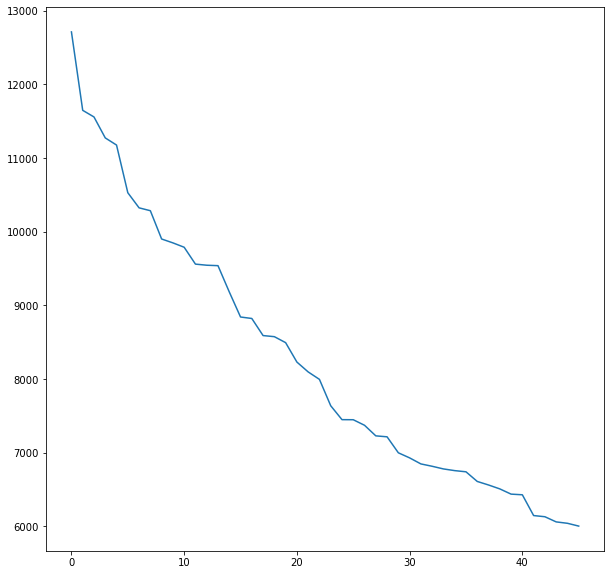

In [37]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(10,10))
plt.plot(dm)

In [38]:
ver(r)

Verification is successful:
r = [0, 6, 11, 16, 13, 12, 7, 8, 14, 10, 9, 17, 3, 1, 21, 4, 15, 18, 2, 5, 20, 19, 0]
Distance = 6004.1


## Results

In [ ]:
print("Current shortest route: ",d_min,"\nStart\tEnd\tDist")
for i in range(len(r)-1):
    print(cityNames[r[i]],"\t",cityNames[r[i+1]],"\t",d[r[i]][r[i+1]])

In [ ]:
# Visualize the shortest route
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
# locations, geographical coordinates in degrees
# convert to radians
Pi = np.pi
#latitude = Pi/180*latitude
#longitude = Pi/180*longitude
# https://en.wikipedia.org/wiki/Spherical_coordinate_system
theta = longitude # polar angle
phi = latitude-Pi/2 # azimuthal angle
R = 40000/(2*Pi) # radius of Earth 
import math
#X = R*np.sin(theta)*np.cos(phi) # x-coordinates in km
#Y = R*np.sin(theta)*np.sin(phi) # y-coordinates in km
#Z = R*np.cos(theta) # z-coordinates in km
X = 40000/360*longitude
Y = 40000/360*latitude

#,'Николаев','Одесса','Полтава','Ровно','Севастополь','Симферополь','Сумы','Тернополь','Ужгород','Харьков','Херсон','Хмельницкий','Черкассы','Чернигов','Черновцы'
# 'Донецк','Луганск',

def plot_tours(cityNames, r):
    tours = [[r[i], r[i+1]] for i in range(N)]
    plt.figure(1, figsize=(20,15))
    for s, tour in enumerate(tours):
        plt.plot([ X[tour[0]], X[tour[1]] ], [ Y[tour[0]], Y[tour[1]] ], color = "black", linewidth=0.5) # line
        plt.scatter(X[tour[1]], Y[tour[1]], marker = 'x', color = 'g', label = cityNames[tour[1]]) # dot
        plt.text(X[tour[1]]*1.001, Y[tour[1]]*1.001, cityNames[tour[1]], fontsize=12)
    #plt.scatter(0,0, marker = "o", color = 'b', label = "factory")
    plt.xlabel("X [km]"), plt.ylabel("Y [km]"), plt.title("Tours") #, plt.legend(loc = 1)
    plt.show()

plot_tours(cityNames, r)

## Nearest-neighbour path
The rule that one first should go from the starting point to the closest point, then to the point closest to this, etc., in general does not yield the shortest route.

In [ ]:
# determine nearest-neighbor route
nnr=[0] # current part of nearest-neighbor route: a list of city numbers along it
nnc=[cityNames[0]] # current list of nearest-neighbor cities
nnd=0 # current distance
for i in range(N-1):
    min = 1e15
    from_city = nnr[i]
    for j in range(1,N):
        if (j not in nnr) and d[from_city][j] < min:
            closest_index = j
            min = d[from_city][j]
    nnr.append(closest_index)
    nnc.append(cityNames[closest_index])
    nnd += d[from_city][closest_index]
nnr.append(0)
nnc.append(cityNames[0])
nnd += d[closest_index][0]
print("Nearest-neighbor route:")
print(nnr)
print(nnc)
print("Nearest-neighbor distance =",nnd)

# Draft

In [ ]:
# Distances from Google
import requests
import json
#Enter your source and destination city
originPoint = input("Please enter your origin city: ")
destinationPoint= input("Please enter your destination city: ")
#Place your google map API_KEY to a variable
apiKey = 'YOUR_API_KEY'
#Store google maps api url in a variable
url = 'https://maps.googleapis.com/maps/api/distancematrix/json?'
# call get method of request module and store respose object
r = requests.get(url + 'origins = ' + originPoint + '&destinations = ' + destinationPoint + '&key = ' + apiKey)
#Get json format result from the above response object
res = r.json()
#print the value of res
print(res)

In [ ]:
def opt2():
    print("Optimize pairs")
    global d_min,r
    d_old = d_min+1
    while d_min < d_old:
        d_old = d_min
        for i in range(N-2):
            SC = r[i]; # starting city, fixed
            A = r[i+1]; B = r[i+2]; # next 2 cities
            FC = r[i+3]; # finishing city, fixed
            l1 = d[SC][A] + d[A][B] + d[B][FC] # AB
            l2 = d[SC][B] + d[B][A] + d[A][FC] # BA
            if l2 < l1:
                r[i+1] = B; r[i+2] = A; # swap A and B
                d_min -= l1-l2
                print(A,B,'->',B,A)
        if d_min < d_old: PR()
def opt3():
    print("Cycle 3 cities")
    global d_min,r
    d_old = d_min+1
    while d_min < d_old:
        d_old = d_min
        for i in range(N-3):
            SC = r[i]; # starting city, fixed
            A = r[i+1]; B = r[i+2]; C = r[i+3]; # next 3 cities
            FC = r[i+4]; # finishing city, fixed
            l1 = d[SC][A] + d[A][B] + d[B][C] + d[C][FC] # ABC
            # one swap at a time is accounted in pairs above: ABC -> ACB, BAC
            l2 = d[SC][B] + d[B][C] + d[C][A] + d[A][FC] # BCA
            if l2 < l1:
                r[i+1] = B; r[i+2] = C; r[i+3] = A; # ABC -> BCA
                d_min -= l1-l2
                A = r[i+1]; B = r[i+2]; C = r[i+3];
                l1 = d[SC][A] + d[A][B] + d[B][C] + d[C][FC]
                print(A,B,C,'->',B,C,A)
            else:
                l2 = d[SC][C] + d[C][A] + d[A][B] + d[B][FC] # CAB (this would be ABC again if we swapped to BCA)
                if l2 < l1:
                    r[i+1] = C; r[i+2] = A; r[i+3] = B; # ABC -> CAB
                    d_min -= l1-l2
                    A = r[i+1]; B = r[i+2]; C = r[i+3];
                    l1 = d[SC][A] + d[A][B] + d[B][C] + d[C][FC]
                    print(A,B,C,'->',C,A,B)
            l2 = d[SC][C] + d[C][B] + d[B][A] + d[A][FC] # CBA
            if l2 < l1:
                r[i+1] = C; r[i+2] = B; r[i+3] = A; # ABC -> CBA
                d_min -= l1-l2
                A = r[i+1]; B = r[i+2]; C = r[i+3];
                l1 = d[SC][A] + d[A][B] + d[B][C] + d[C][FC]
                print('Needed!')
                print(A,B,C,'->',C,B,A)
        if d_min < d_old: PR()
def opt4():
    print("Cycle 4 cities")
    global d_min,r
    d_old = d_min+1
    while d_min < d_old:
        d_old = d_min
        for i in range(N-4):
            SC = r[i]; # starting city, fixed
            A = r[i+1]; B = r[i+2]; C = r[i+3]; D = r[i+4]; # next 4 cities
            FC = r[i+5]; # finishing city, fixed
            l1 = d[SC][A] + d[A][B] + d[B][C] + d[C][D] + d[D][FC] # ABCD
            l2 = d[SC][B] + d[B][C] + d[C][D] + d[D][A] + d[A][FC] # BCDA
            if l2 < l1:
                print(A,B,C,D,'->',B,C,D,A)
                r[i+1] = B; r[i+2] = C; r[i+3] = D; r[i+4] = A; # ABCD -> BCDA
                d_min -= l1-l2
                l1 = l2
                A = r[i+1]; B = r[i+2]; C = r[i+3]; D = r[i+4];
            l2 = d[SC][C] + d[C][D] + d[D][A] + d[A][B] + d[B][FC] # CDAB
            if l2 < l1:
                print(A,B,C,D,'->',C,D,A,B)
                r[i+1] = C; r[i+2] = D; r[i+3] = A; r[i+4] = B; # ABCD -> CDAB
                d_min -= l1-l2
                A = r[i+1]; B = r[i+2]; C = r[i+3]; D = r[i+4];
                l1 = l2
            l2 = d[SC][D] + d[D][A] + d[A][B] + d[B][C] + d[C][FC] # DABC
            if l2 < l1:
                print(A,B,C,D,'->',D,A,B,C)
                r[i+1] = D; r[i+2] = A; r[i+3] = B; r[i+4] = C; # ABCD -> DABC
                d_min -= l1-l2
                A = r[i]; B = r[i+1]; C = r[i+2]; D = r[i+3];
                l1 = d[SC][A] + d[A][B] + d[B][C] + d[C][D] + d[D][FC]
        if d_min < d_old: PR()
def opt5():
    print("Cycle 5 cities")
    global d_min,r
    d_old = d_min+1
    while d_min < d_old:
        d_old = d_min
        for i in range(N-5):
            SC = r[i]; # starting city, fixed
            A = r[i+1]; B = r[i+2]; C = r[i+3]; D = r[i+4]; E = r[i+5] # next 5 cities
            FC = r[i+6]; # finishing city, fixed
            l1 = d[SC][A] + d[A][B] + d[B][C] + d[C][D] + d[D][E] + d[E][FC] # ABCDE
            l2 = d[SC][B] + d[B][C] + d[C][D] + d[D][E] + d[E][A] + d[A][FC] # BCDEA
            if l2 < l1:
                print(A,B,C,D,E,'->',B,C,D,E,A)
                r[i+1] = B; r[i+2] = C; r[i+3] = D; r[i+4] = E; r[i+5] = A; # ABCDE -> BCDEA
                d_min -= l1-l2
                l1 = l2
                A = r[i+1]; B = r[i+2]; C = r[i+3]; D = r[i+4]; E = r[i+5];
            l2 = d[SC][C] + d[C][D] + d[D][E] + d[E][A] + d[A][B] + d[B][FC] # CDEAB
            if l2 < l1:
                print(A,B,C,D,E,'->',C,D,E,A,B)
                r[i+1] = C; r[i+2] = D; r[i+3] = E; r[i+4] = A; r[i+5] = B; # ABCDE -> CDEAB
                d_min -= l1-l2
                l1 = l2
                A = r[i+1]; B = r[i+2]; C = r[i+3]; D = r[i+4]; E = r[i+5];
            l2 = d[SC][D] + d[D][E] + d[E][A] + d[A][B] + d[B][C] + d[C][FC] # DEABC
            if l2 < l1:
                print(A,B,C,D,E,'->',D,E,A,B,C)
                r[i+1] = D; r[i+2] = E; r[i+3] = A; r[i+4] = B; r[i+5] = C; # ABCDE -> DEABC
                d_min -= l1-l2
                l1 = l2
                A = r[i+1]; B = r[i+2]; C = r[i+3]; D = r[i+4]; E = r[i+5];           
            l2 = d[SC][E] + d[E][A] + d[A][B] + d[B][C] + d[C][D] + d[D][FC] # EABCD
            if l2 < l1:
                print(A,B,C,D,E,'->',E,A,B,C,D)
                r[i+1] = E; r[i+2] = A; r[i+3] = B; r[i+4] = C; r[i+5] = D; # ABCDE -> EABCD
                d_min -= l1-l2
                l1 = l2
                A = r[i+1]; B = r[i+2]; C = r[i+3]; D = r[i+4]; E = r[i+5];           
        if d_min < d_old: PR()
def opt6():
    print("Cycle 6 cities")
    global d_min,r
    d_old = d_min+1
    while d_min < d_old:
        d_old = d_min
        for i in range(N-6):
            SC = r[i]; # starting city, fixed
            A = r[i+1]; B = r[i+2]; C = r[i+3]; D = r[i+4]; E = r[i+5]; F = r[i+6]; # next 6 cities
            FC = r[i+7]; # finishing city, fixed
            l1 = d[SC][A] + d[A][B] + d[B][C] + d[C][D] + d[D][E] + d[E][F] + d[F][FC] # ABCDEF
            l2 = d[SC][B] + d[B][C] + d[C][D] + d[D][E] + d[E][F] + d[F][A] + d[A][FC] # BCDEFA
            if l2 < l1:
                print(A,B,C,D,E,F,'->',B,C,D,E,F,A)
                r[i+1] = B; r[i+2] = C; r[i+3] = D; r[i+4] = E; r[i+5] = F; r[i+6] = A; # ABCDEF -> BCDEFA
                d_min -= l1-l2
                l1 = l2
                A = r[i+1]; B = r[i+2]; C = r[i+3]; D = r[i+4]; E = r[i+5]; F = r[i+6];
            l2 = d[SC][C] + d[C][D] + d[D][E] + d[E][F] + d[F][A] + d[A][B] + d[B][FC] # CDEFAB
            if l2 < l1:
                print(A,B,C,D,E,F,'->',C,D,E,F,A,B)
                r[i+1] = C; r[i+2] = D; r[i+3] = E; r[i+4] = F; r[i+5] = A; r[i+6] = B; # ABCDEF -> CDEFAB
                d_min -= l1-l2
                l1 = l2
                A = r[i+1]; B = r[i+2]; C = r[i+3]; D = r[i+4]; E = r[i+5]; F = r[i+6];
            l2 = d[SC][D] + d[D][E] + d[E][F] + d[F][A] + d[A][B] + d[B][C] + d[C][FC] # DEFABC
            if l2 < l1:
                print(A,B,C,D,E,F,'->',D,E,F,A,B,C)
                r[i+1] = D; r[i+2] = E; r[i+3] = F; r[i+4] = A; r[i+5] = B; r[i+6] = C; # ABCDEF -> DEFABC
                d_min -= l1-l2
                l1 = l2
                A = r[i+1]; B = r[i+2]; C = r[i+3]; D = r[i+4]; E = r[i+5]; F = r[i+6];           
            l2 = d[SC][E] + d[E][F] + d[F][A] + d[A][B] + d[B][C] + d[C][D] + d[D][FC] # EFABCD
            if l2 < l1:
                print(A,B,C,D,E,F,'->',E,F,A,B,C,D)
                r[i+1] = E; r[i+2] = F; r[i+3] = A; r[i+4] = B; r[i+5] = C; r[i+6] = D; # ABCDEF -> EFABCD
                d_min -= l1-l2
                l1 = l2
            A = r[i+1]; B = r[i+2]; C = r[i+3]; D = r[i+4]; E = r[i+5]; F = r[i+6];           
            l2 = d[SC][F] + d[F][A] + d[A][B] + d[B][C] + d[C][D] + d[D][E] + d[E][FC] # FABCDE
            if l2 < l1:
                print(A,B,C,D,E,F,'->',F,A,B,C,D,E)
                r[i+1] = F; r[i+2] = A; r[i+3] = B; r[i+4] = C; r[i+5] = D; r[i+6] = E; # ABCDEF -> FABCDE
                d_min -= l1-l2
                l1 = l2
                A = r[i+1]; B = r[i+2]; C = r[i+3]; D = r[i+4]; E = r[i+5]; F = r[i+6];           
        if d_min < d_old: PR()
def opt7():
    print("Cycle 7 cities")
    global d_min,r
    d_old = d_min+1
    while d_min < d_old:
        d_old = d_min
        for i in range(N-7):
            SC = r[i]; # starting city, fixed
            A = r[i+1]; B = r[i+2]; C = r[i+3]; D = r[i+4]; E = r[i+5]; F = r[i+6]; G = r[i+7]; # next 7 cities
            FC = r[i+8]; # finishing city, fixed
            l1 = d[SC][A] + d[A][B] + d[B][C] + d[C][D] + d[D][E] + d[E][F] + d[F][G] + d[G][FC] # ABCDEFG
            l2 = d[SC][B] + d[B][C] + d[C][D] + d[D][E] + d[E][F] + d[F][G] + d[G][A] + d[A][FC] # BCDEFGA
            if l2 < l1:
                print(A,B,C,D,E,F,G,'->',B,C,D,E,F,G,A)
                r[i+1] = B; r[i+2] = C; r[i+3] = D; r[i+4] = E; r[i+5] = F; r[i+6] = G; r[i+7] = A; # ABCDEFG -> BCDEFGA
                d_min -= l1-l2
                l1 = l2
                A = r[i+1]; B = r[i+2]; C = r[i+3]; D = r[i+4]; E = r[i+5]; F = r[i+6]; G = r[i+7];
            l2 = d[SC][C] + d[C][D] + d[D][E] + d[E][F] + d[F][G] + d[G][A] + d[A][B] + d[B][FC] # CDEFGAB
            if l2 < l1:
                print(A,B,C,D,E,F,G,'->',C,D,E,F,G,A,B)
                r[i+1] = C; r[i+2] = D; r[i+3] = E; r[i+4] = F; r[i+5] = G; r[i+6] = A; r[i+7] = B; # ABCDEFG -> CDEFABG
                d_min -= l1-l2
                l1 = l2
                A = r[i+1]; B = r[i+2]; C = r[i+3]; D = r[i+4]; E = r[i+5]; F = r[i+6]; G = r[i+7];
            l2 = d[SC][D] + d[D][E] + d[E][F] + d[F][G] + d[G][A] + d[A][B] + d[B][C] + d[C][FC] # DEFGABC
            if l2 < l1:
                print(A,B,C,D,E,F,G,'->',D,E,F,G,A,B,C)
                r[i+1] = D; r[i+2] = E; r[i+3] = F; r[i+4] = G; r[i+5] = A; r[i+6] = B; r[i+7] = C; # ABCDEFG -> DEFGABC
                d_min -= l1-l2
                l1 = l2
                A = r[i+1]; B = r[i+2]; C = r[i+3]; D = r[i+4]; E = r[i+5]; F = r[i+6]; G = r[i+7];           
            l2 = d[SC][E] + d[E][F] + d[F][G] + d[G][A] + d[A][B] + d[B][C] + d[C][D] + d[D][FC] # EFGABCD
            if l2 < l1:
                print(A,B,C,D,E,F,G,'->',E,F,G,A,B,C,D)
                r[i+1] = E; r[i+2] = F; r[i+3] = G; r[i+4] = A; r[i+5] = B; r[i+6] = C; r[i+7] = D; # ABCDEFG -> EFGABCD
                d_min -= l1-l2
                l1 = l2
            A = r[i+1]; B = r[i+2]; C = r[i+3]; D = r[i+4]; E = r[i+5]; F = r[i+6]; G = r[i+7];          
            l2 = d[SC][F] + d[F][G] + d[G][A] + d[A][B] + d[B][C] + d[C][D] + d[D][E] + d[E][FC] # FGABCDE
            if l2 < l1:
                print(A,B,C,D,E,F,G,'->',F,G,A,B,C,D,E)
                r[i+1] = F; r[i+2] = G; r[i+3] = A; r[i+4] = B; r[i+5] = C; r[i+6] = D; r[i+7] = E; # ABCDEFG -> FGABCDE
                d_min -= l1-l2
                l1 = l2
                A = r[i+1]; B = r[i+2]; C = r[i+3]; D = r[i+4]; E = r[i+5]; F = r[i+6]; G = r[i+7];           
            l2 = d[SC][G] + d[G][A] + d[A][B] + d[B][C] + d[C][D] + d[D][E] + d[E][F] + d[F][FC] # GABCDEF
            if l2 < l1:
                print(A,B,C,D,E,F,G,'->',G,A,B,C,D,E,F)
                r[i+1] = G; r[i+2] = A; r[i+3] = B; r[i+4] = C; r[i+5] = D; r[i+6] = E; r[i+7] = F;  # ABCDEFG -> GABCDEF
                d_min -= l1-l2
                l1 = l2
                A = r[i+1]; B = r[i+2]; C = r[i+3]; D = r[i+4]; E = r[i+5]; F = r[i+6]; G = r[i+7];           
        if d_min < d_old: PR()


## Swap 2 first

In [ ]:
def swap2first():
    #print("Swap 2 cities, apply the first working result")
    global d_min,r,c, i_opt,j_opt,dr
    for i in range(1,N-1):
        dr_out1 = -d[r[i-1]][r[i]] - d[r[i]][r[i+1]] # r[i] is taken out
        for j in range(i+1,N):
            if (j <= i-2) or (i+2 <= j):
                dr_out2 = -d[r[j-1]][r[j]] - d[r[j]][r[j+1]] # r[j] is taken out
                dr_in1 = d[r[j-1]][r[i]] + d[r[i]][r[j+1]] # r[i] is put in j
                dr_in2 = d[r[i-1]][r[j]] + d[r[j]][r[i+1]] # r[j] is put in i
                dr = dr_out1+dr_out2+dr_in1+dr_in2
            elif j == i-1:
                dr_out2 = -d[r[j-1]][r[j]] # r[j] is taken out
                dr_in = d[r[j-1]][r[i]] + d[r[i]][r[j]] + d[r[j]][r[i+1]] # r[i] is put in j, r[j] is put in i
                dr = dr_out1+dr_out2+dr_in
            elif j == i+1:
                dr_out2 = -d[r[j]][r[j+1]] # r[j] is taken out
                dr_in = d[r[i-1]][r[j]] + d[r[j]][r[i]] + d[r[i]][r[j+1]] # r[j] is put in i, r[i] is put in j
                dr = dr_out1+dr_out2+dr_in
            if dr < 0:
                d_min = d_min + dr; i_opt=i; j_opt=j;
                tmp = r[i]; r[i] = r[j]; r[j] = tmp;
                print(str(r[i])+"<->"+str(r[j])+"; dr="+str(dr))
                return True
    if dr == 0: return False

d = 12713.0 ; r = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 0]
2<->1; dr=-1064.6
3<->2; dr=-90.00000000000011
12<->3; dr=-284.4000000000001
1<->12; dr=-97.0
4<->1; dr=-647.0
7<->4; dr=-205.39999999999998
12<->7; dr=-39.0
6<->2; dr=-384.0
2<->7; dr=-52.59999999999991
5<->12; dr=-59.39999999999998
2<->5; dr=-229.0
18<->2; dr=-15.0
16<->18; dr=-6.0
5<->16; dr=-356.0
1<->5; dr=-341.0
16<->1; dr=-20.0
6<->16; dr=-232.0
11<->6; dr=-15.0
1<->11; dr=-81.0
6<->1; dr=-263.6
13<->6; dr=-134.0
5<->13; dr=-101.0
17<->5; dr=-358.0
10<->17; dr=-188.9000000000001
9<->10; dr=-1.099999999999909
1<->9; dr=-75.30000000000007
6<->1; dr=-143.60000000000002
20<->6; dr=-13.0
2<->20; dr=-217.0
6<->2; dr=-69.0
8<->4; dr=-82.0
15<->8; dr=-32.0
8<->4; dr=-36.0
8<->15; dr=-23.0
14<->15; dr=-16.0
9<->17; dr=-131.0
2<->18; dr=-48.0
21<->2; dr=-53.0
21<->15; dr=-71.0
15<->14; dr=-9.0
18<->5; dr=-282.0
14<->15; dr=-16.0
19<->20; dr=-70.0
2<->19; dr=-19.0
5<->20; dr=-38.0
Distances 

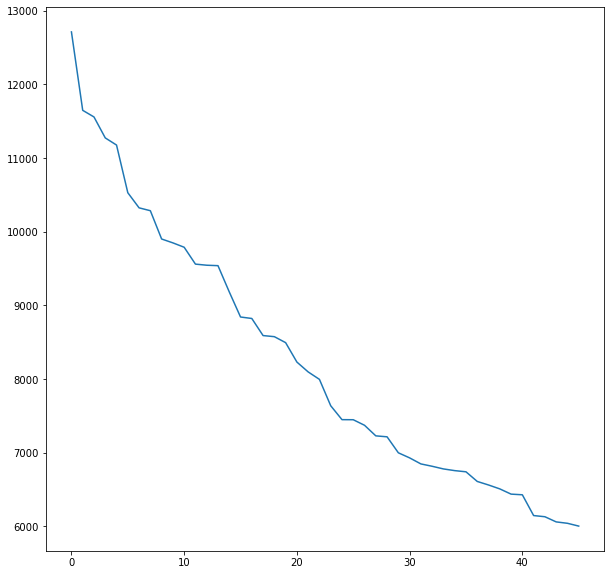

In [58]:
init(); dm=[d_min]; i=[0]; j=[0]; dr=[0];
while swap2first():
    dm.append(d_min)
    #i.append(i_opt); j.append(j_opt); dr.append(dr)
print("Distances =",dm)
ver(r)
plt.figure(1, figsize=(10,10))
plt.plot(dm)

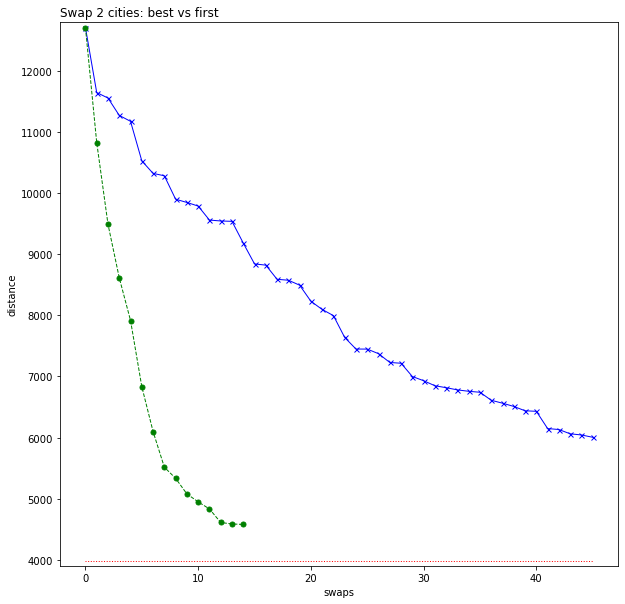

In [66]:
d_swap2first = [12713.0, 11648.4, 11558.4, 11274.0, 11177.0, 10530.0, 10324.6, 10285.6, 9901.6, 9849.0, 9789.6, 9560.6, 9545.6, 9539.6, 9183.6, 8842.6, 8822.6, 8590.6, 8575.6, 8494.6, 8231.0, 8097.0, 7996.0, 7638.0, 7449.1, 7448.0, 7372.7, 7229.099999999999, 7216.099999999999, 6999.099999999999, 6930.099999999999, 6848.099999999999, 6816.099999999999, 6780.099999999999, 6757.099999999999, 6741.099999999999, 6610.099999999999, 6562.099999999999, 6509.099999999999, 6438.099999999999, 6429.099999999999, 6147.099999999999, 6131.099999999999, 6061.099999999999, 6042.099999999999, 6004.099999999999]
d_swap2best = [12713.0, 10830.0, 9493.0, 8615.0, 7916.0, 6833.0, 6098.0, 5514.4, 5332.0, 5077.0, 4947.0, 4831.1, 4609.1, 4585.1, 4577.1]

plt.figure(1, figsize=(10,10))
plt.title('Swap 2 cities: best vs first', loc='left')
plt.plot(d_swap2first, color='blue', marker='x', linestyle='solid', linewidth=1, markersize=5)
plt.plot(d_swap2best, color='green', marker='o', linestyle='dashed', linewidth=1, markersize=5)
plt.plot(np.array([3986.1]*len(d_swap2first)), color='red', linestyle='dotted', linewidth=1)
plt.plot(ypoints, color = 'r')
plt.xlabel("swaps")
plt.ylabel("distance")
plt.ylim([3900, 12800])
plt.show()